In [1]:
!pip install "numpy<2.0" #older version of numpy 

#!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


In the cell below **"img_dir"** creates a folder on the file browser tab you then can put the beam images into the folder that is created.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Use PIL for image loading/saving

# Set the directory path
img_dir = os.path.expanduser("~/Documents/Poplabimages/9.8.25")

# Loop through the files in the directory
# for filename in os.listdir(img_dir):
#     if "background" in filename:
#         continue  # Skip background images

#     elif filename.endswith((".tiff", ".tif")):  # Filter image files
#         file_path = os.path.join(img_dir, filename)

#         # Load image as grayscale array
#         image = Image.open(file_path).convert("L")
#         image_array = np.array(image)

#         # Normalize image to 0–255
#         norm_img = 4095 * (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
#         norm_img = norm_img.astype(np.uint8)

#         # Convert back to Image object and save
#         norm_image = Image.fromarray(norm_img)

#         # Create the output filename
#         new_filename = "norm_" + filename
#         output_path = os.path.join(img_dir, new_filename)

#         norm_image.save(output_path)
#         print(f"Saved normalized image: {output_path}")

- In the cell below **"img1&2"** will specifically pick the image you want to process
- **"plt.imread"** will create 2D numpy arrays based on the image intensity so higher numbers on the array means there is a high intensity while low numbers or 0 indicates that there is little to no intenity. I.E. each number on that array represents 1 pixel which later is quantified.
  

  Each row of the array is a horizontal line of pixels

  Each column of the array is a vertical line of pixels

  * Note: Mutiplying the pixel quantity numbers will give you the total pixel quantity 


First image numpy arrays: [[ 0 16  0 ...  0  0 16]
 [ 0  0 16 ...  0  0  0]
 [ 0 16 16 ...  0  0 16]
 ...
 [32  0 16 ...  0  0 16]
 [ 0 48 16 ... 16  0  0]
 [ 0  0  0 ...  0  0  0]] pixel quantity: (1080, 1440)
Second image numpy arrays: [[ 0 16  0 ...  0  0 16]
 [ 0  0 16 ...  0  0  0]
 [ 0 16 16 ...  0  0 16]
 ...
 [32  0 16 ...  0  0 16]
 [ 0 48 16 ... 16  0  0]
 [ 0  0  0 ...  0  0  0]] pixel quantity: (1080, 1440)


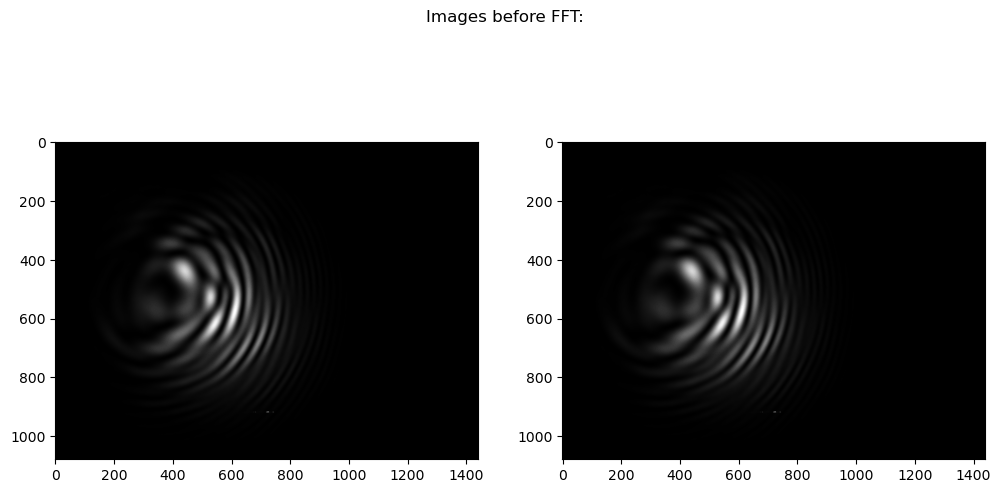

In [3]:
img1 = os.path.join(img_dir, "OAM L1 Hollow Core Coupled Beam (Off Axis.tiff")
img2 = os.path.join(img_dir, "hollow_core_interference(off-axis)2nd_sample_beam.tiff")

OAM_Hollow_Int_Norm_1 = plt.imread(img1)
print('First image numpy arrays:',(OAM_Hollow_Int_Norm_1),'pixel quantity:',OAM_Hollow_Int_Norm_1.shape)
OAM_Hollow_Int_Norm_2 = plt.imread(img2)
print('Second image numpy arrays:',(OAM_Hollow_Int_Norm_2),'pixel quantity:',OAM_Hollow_Int_Norm_2.shape)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Images before FFT:')
ax1.imshow(OAM_Hollow_Int_Norm_1,cmap = 'gray') 
ax2.imshow(OAM_Hollow_Int_Norm_2,cmap = 'gray')


The cell below will put the 2D numpy arrays obtained from the images above through the fourier transforms. 

- **"np.fft.fft2"** is the 2D Fast Fourier Transform which is necessary for our 2D numpy array.

  2D FFT Formula:
$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-2\pi i \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$


  How this works?

  Ex. 

  1D FFT Formula:

  $$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-2\pi i \cdot \frac{kn}{N}}, \quad k = 0, 1, \dots, N-1
$$
 
where $$x[n]$$ is the input sequence

$$X[k]$$ the output frequency component

and $$ e^{-2\pi i \cdot \frac{kn}{N}}$$ the euler number 

Assuming x= [0,1,2,3] and N=4 then we have 

$$X[0]= 0+1+2+3+4$$

$$X[1]= 0 \cdot e^{0} + 1 \cdot e^{-2\pi i \cdot \frac{1}{4}} + 2 \cdot e^{-2\pi i \cdot \frac{2}{4}} + 3 \cdot e^{-2\pi i \cdot \frac{3}{4}}$$

$$X[1]= 0 + 1 \cdot (-i) + 2 \cdot (-1) + 3 \cdot (i) $$

$$X[1]= -2 +2i$$

And so on for X[2] and X[3]... 

# In conclusion

Based on X[0] and X[1] we can conclude that the first two fourier transforms of [0,1,2,3] will be [6+0j, -2+2j, ...] and so this is how the fft's are occuring after the arrays from the original image are obtained. 

In [17]:

def nparrayfft(images):
    fft_result = np.fft.fft2(images)
    fft_shifted = np.fft.fftshift(fft_result)
    log_mag = np.log(1 + np.abs(fft_shifted))
    log_mag_norm = (log_mag - log_mag.min()) / (log_mag.max() - log_mag.min())
    return log_mag_norm

log_mag_norm = nparrayfft(OAM_Hollow_Int_Norm_1)
log_mag_norm2 = nparrayfft(OAM_Hollow_Int_Norm_2)
log_mag_norm3 = nparrayfft(OAM_Hollow_Int_Norm_3)



# Save image without colorbar or axes, preserving pixel alignment
# plt.imsave(os.path.join(out_dir, 'NoCBAR_FFT_OAM_Hollow_Int_Norm_1_Magnitude.png'), log_mag_norm, cmap='gray')


# First Plot 


    - First 540:

**Increasing** the first 540 will vertically crop the beam image from the top therefore cutting the beam image from top to bottom and only making the bottom of the beam image visible. 

**Decreasing** the first 540 will vertically elongate the image from the top therefore pushing the beam image further down and creating a gap above the beam image.

    - Second 540: 

**Increasing** the second 540 will vertically elongate the image from the bottom therefore pushing the beam image further up and creating a gap below the beam image.

**Decreasing** the second 540 will vertically crop the image from the bottom therefore cutting the beam image from bottom to top and only making the top of the beam image visible. 

    - First 720:

**Increasing** the first 720 will horizontally crop the beam image from left to right therefore only making the right side of the image visible.

**Decreasing** the first 720 will horizontally elongate the image from right to left and therefore create an empty space to the left of the beam image. 

    - Second 720:

**Increasing** the second 720 will horizontally elongate the beam image from left to right and therefore create an empty space to the right of the beam image. 

**Decreasing** the second 720 will horizontally crop the beam image from right to left and therefore only make the right side of the beam image visible. 

# Second Plot:

The adjustment of these parameters will have the same effect as the ones from the first plot. 

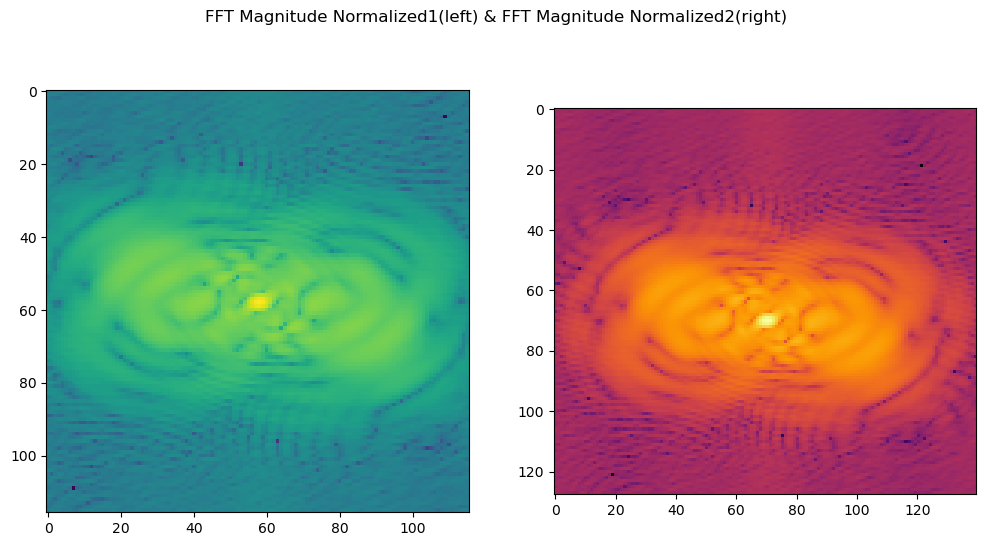

In [18]:
r=58
r2=70 #changing the value of r will either zoom in or zoom out of the beam image 
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('FFT Magnitude Normalized1(left) & FFT Magnitude Normalized2(right)')
ax1.imshow(log_mag_norm[540 - r: 540 + r, 720 - r: 720 + r], cmap = 'viridis') 
ax2.imshow(log_mag_norm2[540 - r2: 540 + r, 720 - r2: 720 + r2], cmap = 'inferno')  

# circ = plt.Circle((center_col, center_row), radius, color='r', fill=False)
# plt.gca().add_patch(circ)

# # Inverse shift and IFFT to get complex image
# ifft_unshifted = np.fft.ifftshift(filtered_fft)
# complex_image = np.fft.ifft2(ifft_unshifted)

# # Extract phase
# wrapped_phase = np.angle(complex_image)

# plt.figure(figsize=(6,6))
# plt.imshow(wrapped_phase, cmap='twilight', vmin=-np.pi, vmax=np.pi)
# plt.title("Wrapped Phase +1 Order (Filtered Carrier)")

# cbar = plt.colorbar()

# plt.figure(figsize=(6,6))
# plt.imshow(first_order_lobe, cmap='twilight', vmin=-np.pi, vmax=np.pi)
# plt.title("first order lobe check")
# cbar = plt.colorbar()

# # Format colorbar with π ticks
# import matplotlib.ticker as ticker
# tick_locs = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
# tick_labels = [r"$-π$", r"$-\frac{1}{2}π$", r"$0$", r"$\frac{1}{2}π$", r"$π$"]
# cbar.set_ticks(tick_locs)
# cbar.set_ticklabels(tick_labels)
# plt.tight_layout()
# plt.savefig(os.path.join(out_dir, "Interferogram_Normalized_+1_Order_Phase_FFT.tif"), bbox_inches='tight')
# plt.show()



In [7]:
wrapped_first_order = np.angle(first_order_lobe)
plt.figure(figsize=(6,6))
plt.imshow(np.abs(All_Lobes ))
plt.title("Magnitude")
cbar = plt.colorbar()



NameError: name 'first_order_lobe' is not defined

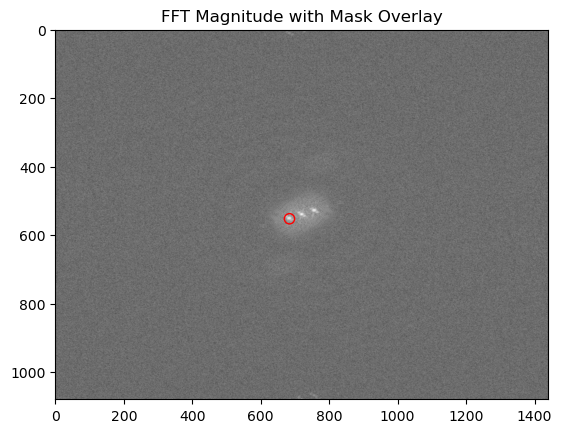

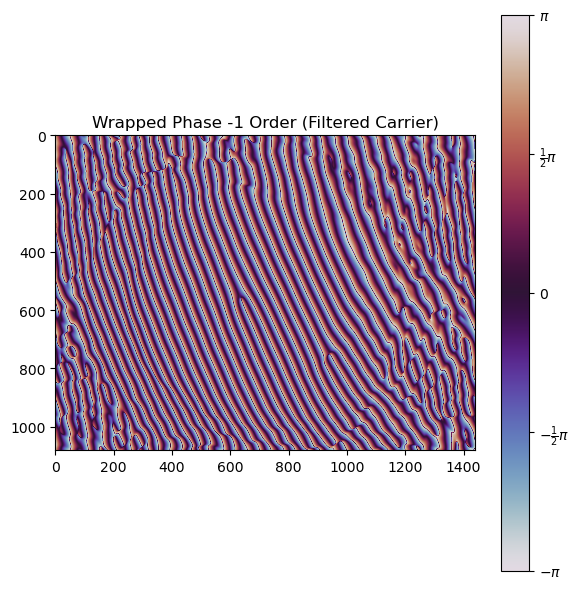

<Figure size 640x480 with 0 Axes>

In [ ]:
# Coordinates of one lobe, found manually by inspecting spectrum
center_row, center_col = 552, 684  # <-- update based on your image
radius = 15  # size of filter window

rows, cols = OAM_Hollow_Int_Norm__1.shape
Y, X = np.ogrid[:rows, :cols]
mask = (X - center_col)**2 + (Y - center_row)**2 <= radius**2


# Apply mask to FFT
filtered_fft = np.zeros_like(fft_shifted, dtype=complex)
filtered_fft[mask] = fft_shifted[mask]

plt.imshow(np.log(1 + np.abs(fft_shifted)), cmap='gray')
circ = plt.Circle((center_col, center_row), radius, color='r', fill=False)
plt.gca().add_patch(circ)
plt.title("FFT Magnitude with Mask Overlay")
plt.show()

# Inverse shift and IFFT to get complex image
ifft_unshifted = np.fft.ifftshift(filtered_fft)
complex_image = np.fft.ifft2(ifft_unshifted)

# Extract phase
wrapped_phase = np.angle(complex_image)

plt.figure(figsize=(6,6))
plt.imshow(wrapped_phase, cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.title("Wrapped Phase -1 Order (Filtered Carrier)")
cbar = plt.colorbar()

# Format colorbar with π ticks
import matplotlib.ticker as ticker
tick_locs = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-π$", r"$-\frac{1}{2}π$", r"$0$", r"$\frac{1}{2}π$", r"$π$"]
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(out_dir, "Intrferogram_Normalized_-1_Order_Phase_FFT.tif"), bbox_inches='tight')

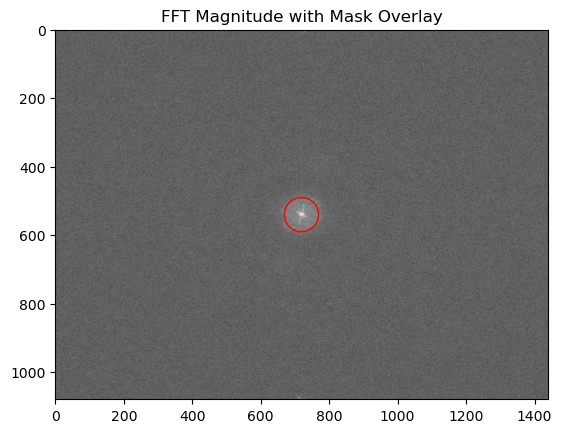

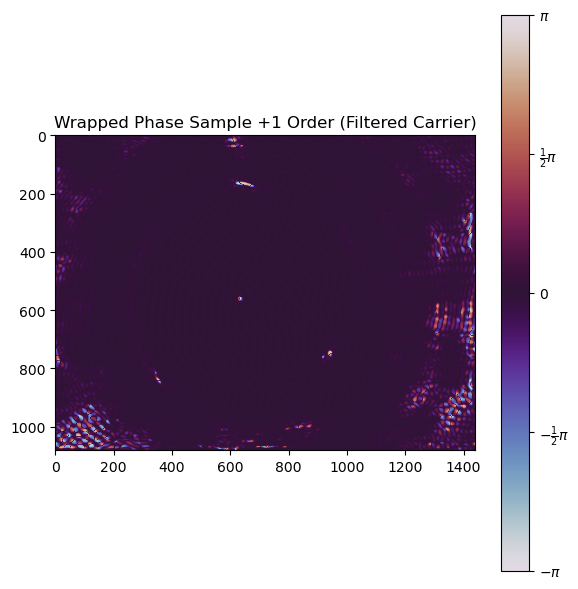

<Figure size 640x480 with 0 Axes>

In [ ]:
fft_result_S = np.fft.fft2(Sample_Norm)
fft_shifted_S = np.fft.fftshift(fft_result_S)
log_mag_S = np.log(1 + np.abs(fft_shifted_S))

log_mag_norm_S = (log_mag_S - log_mag_S.min()) / (log_mag_S.max() - log_mag_S.min())

# Coordinates of one lobe, found manually by inspecting spectrum
center_row, center_col = 540, 719  # <-- update based on your image
radius = 50  # size of filter window

rows, cols = Sample_Norm.shape
Y, X = np.ogrid[:rows, :cols]
mask = (X - center_col)**2 + (Y - center_row)**2 <= radius**2


# Apply mask to FFT
filtered_fft_S = np.zeros_like(fft_shifted_S, dtype=complex)
filtered_fft_S[mask] = fft_shifted_S[mask]

plt.imshow(np.log(1 + np.abs(fft_shifted_S)), cmap='gray')
circ = plt.Circle((center_col, center_row), radius, color='r', fill=False)
plt.gca().add_patch(circ)
plt.title("FFT Magnitude with Mask Overlay")
plt.show()

# Inverse shift and IFFT to get complex image
ifft_unshifted_S = np.fft.ifftshift(filtered_fft_S)
complex_image_S = np.fft.ifft2(ifft_unshifted_S)

# Extract phase
wrapped_phase_S = np.angle(complex_image_S)

plt.figure(figsize=(6,6))
plt.imshow(wrapped_phase_S, cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.title("Wrapped Phase Sample +1 Order (Filtered Carrier)")
cbar = plt.colorbar()

# Format colorbar with π ticks
import matplotlib.ticker as ticker
tick_locs = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-π$", r"$-\frac{1}{2}π$", r"$0$", r"$\frac{1}{2}π$", r"$π$"]
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(out_dir, "Sample_Normalized_+1_Order_Phase_FFT.tif"), bbox_inches='tight')

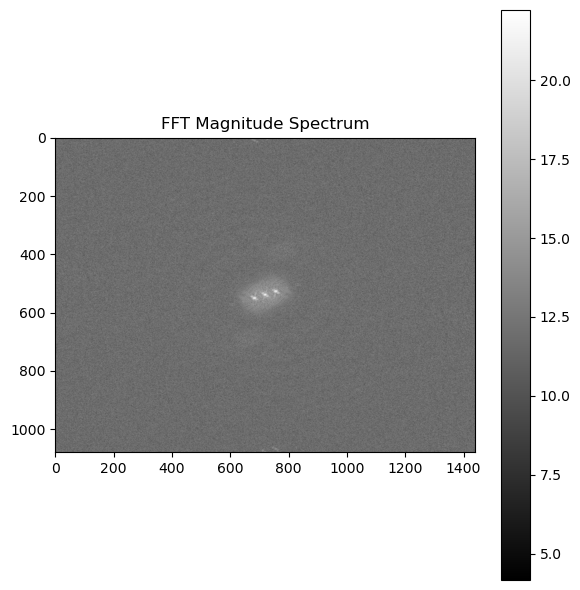

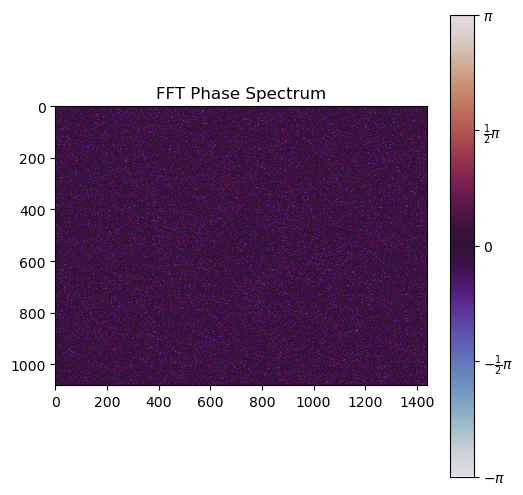

In [ ]:
import matplotlib.ticker as ticker


# Format colorbar ticks as multiples of π
# Define tick positions: integer and half-integer multiples of π
pi = np.pi
tick_locs = [-pi, -pi/2, 0, pi/2, pi]

# Define custom labels
tick_labels = [r"$-π$", r"$-\frac{1}{2}π$", r"$0$", r"$\frac{1}{2}π$", r"$π$"]


# Assume `image` is a 2D NumPy array
fft_result = np.fft.fft2(OAM_Hollow_Int_Norm__1)
fft_shifted = np.fft.fftshift(fft_result)
magnitude = np.abs(fft_shifted)
log_magnitude = np.log(1 + magnitude)  # log scale for visibility


# Magnitude Spectrum
magnitude = np.abs(fft_shifted)
log_magnitude = np.log(1 + magnitude)  # Log for visibility

# Phase Spectrum
phase = np.angle(fft_shifted)  # Values between -π and π

# Create output directory if needed
os.makedirs(out_dir, exist_ok=True)

# Plot Magnitude Spectrum
plt.figure(figsize=(6, 6))
plt.imshow(log_magnitude, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.colorbar()
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "Magnitude_FFT_OAM_Hollow_Int_Norm__1.tif"), bbox_inches='tight')
plt.show()

# Plot Phase Spectrum
plt.figure(figsize=(6, 6))
im = plt.imshow(phase, cmap='twilight')  # Good colormap for phase
plt.title("FFT Phase Spectrum")
cbar = plt.colorbar(im)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)
plt.savefig(os.path.join(out_dir, "Phase_FFT_OAM_Hollow_Int_Norm__1.tif"), bbox_inches='tight')
plt.show()

## GPT Edits



In [ ]:
img = OAM_Hollow_Int_Norm__1.astype(np.float32)
img -= img.mean()

# Hann window
win_y = np.hanning(img.shape[0])
win_x = np.hanning(img.shape[1])
window = np.outer(win_y, win_x)
imgw = img * window

F = np.fft.fftshift(np.fft.fft2(imgw))
mag = np.abs(F)

# suppress DC neighborhood
rows, cols = img.shape
cy, cx = rows//2, cols//2
Y, X = np.ogrid[:rows, :cols]
dc_mask = (X-cx)**2 + (Y-cy)**2 <= (15**2)  # adjust radius if needed
mag_dc_supp = mag.copy()
mag_dc_supp[dc_mask] = 0

# find brightest lobe (one sideband)
peak_idx = np.unravel_index(np.argmax(mag_dc_supp), mag.shape)
py, px = peak_idx                      # peak coordinates in fftshifted grid

radius = 20  # tune; large enough to pass the object bandwidth, small enough to reject noise/other orders
mask = (X-px)**2 + (Y-py)**2 <= radius**2

# Extract the lobe
lobe = np.zeros_like(F, dtype=complex)
lobe[mask] = F[mask]

# Recentre it to DC by rolling the array
shift_y, shift_x = cy - py, cx - px
lobe_centered = np.roll(np.roll(lobe, shift_y, axis=0), shift_x, axis=1)

# Optional: apply a soft circular low-pass around DC to clean edges
R = ((X-cx)**2 + (Y-cy)**2)**0.5
lp = (R <= radius).astype(float)  # replace with a raised-cosine for smoother edges if you like
lobe_centered *= lp

# Complex field
field = np.fft.ifft2(np.fft.ifftshift(lobe_centered))
phase_wrapped = np.angle(field)

from skimage.restoration import unwrap_phase
phase_unwrapped = unwrap_phase(phase_wrapped)

np.save(os.path.join(out_dir, "phase_wrapped.npy"), phase_wrapped)
np.save(os.path.join(out_dir, "phase_unwrapped.npy"), phase_unwrapped)

import tifffile as tiff
tiff.imwrite(os.path.join(out_dir, "phase_unwrapped_float.tif"),
             phase_unwrapped.astype(np.float32))


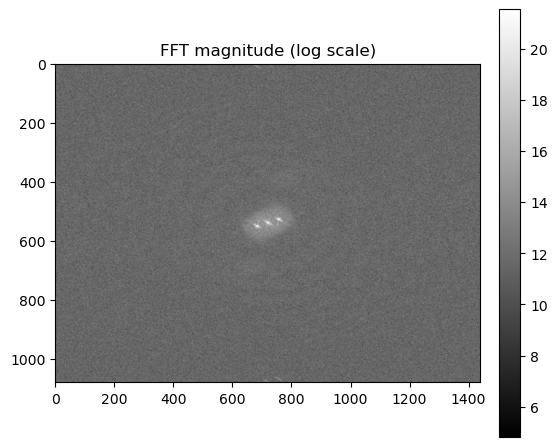

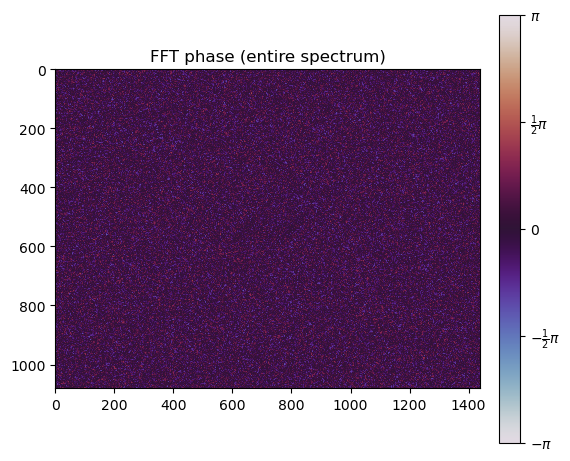

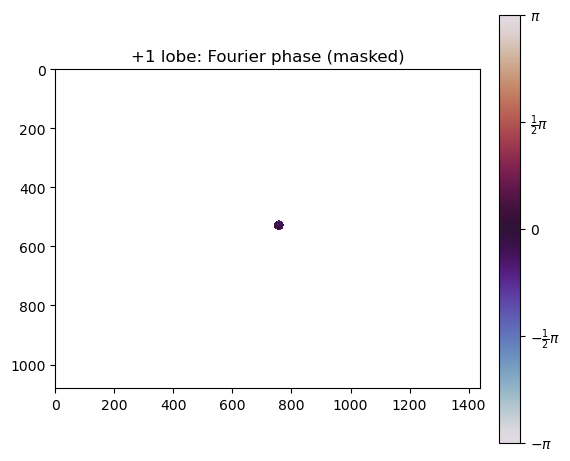

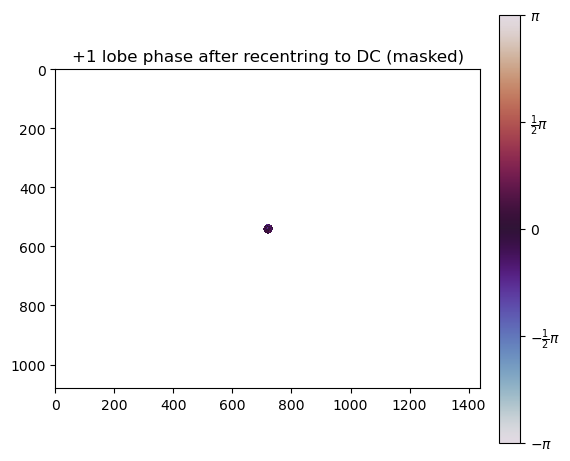

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- inputs you already have ---
# OAM_Hollow_Int_Norm__1: your interferogram, float32/float64
# center_row, center_col, radius: the +1-lobe centre and mask radius (pixels)
out_dir = "path/to/out"
os.makedirs(out_dir, exist_ok=True)

# --------- 0) window & FFT (helps reduce ringing) ----------
img = OAM_Hollow_Int_Norm__1.astype(np.float32)
img -= img.mean()

win_y = np.hanning(img.shape[0])
win_x = np.hanning(img.shape[1])
window = np.outer(win_y, win_x)
imgw = img * window

F = np.fft.fftshift(np.fft.fft2(imgw))
Mag = np.abs(F)
Ph  = np.angle(F)  # Fourier-phase of the whole spectrum

rows, cols = img.shape
Y, X = np.ogrid[:rows, :cols]

# --------- 1) visualize FFT magnitude for orientation ----------
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(np.log1p(Mag), cmap="gray")
ax.set_title("FFT magnitude (log scale)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.savefig(os.path.join(out_dir, "fft_magnitude_log.png"), dpi=200, bbox_inches="tight")
plt.show()

# --------- 2) phase of the whole FFT (for completeness) ----------
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Ph, cmap="twilight", vmin=-np.pi, vmax=np.pi)
ax.set_title("FFT phase (entire spectrum)")
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
tick_locs = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-π$", r"$-\frac{1}{2}π$", r"$0$", r"$\frac{1}{2}π$", r"$π$"]
cbar.set_ticks(tick_locs); cbar.set_ticklabels(tick_labels)
fig.savefig(os.path.join(out_dir, "fft_phase_full.png"), dpi=200, bbox_inches="tight")
plt.show()

# --------- 3) phase inside +1 mask only (everything else = NaN) ----------
mask = (X - center_col)**2 + (Y - center_row)**2 <= radius**2

phase_plus1_only = np.full_like(Ph, np.nan, dtype=np.float32)
phase_plus1_only[mask] = Ph[mask]

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(phase_plus1_only, cmap="twilight", vmin=-np.pi, vmax=np.pi)
ax.set_title("+1 lobe: Fourier phase (masked)")
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_ticks(tick_locs); cbar.set_ticklabels(tick_labels)
fig.savefig(os.path.join(out_dir, "fft_phase_plus1_masked.png"), dpi=200, bbox_inches="tight")
plt.show()

# --------- 4) recentre the +1 lobe to DC and view its phase ----------
# (rolling the masked spectrum so the lobe center goes to [rows//2, cols//2])
cy, cx = rows//2, cols//2
shift_y, shift_x = cy - center_row, cx - center_col

F_plus1 = np.zeros_like(F, dtype=complex)
F_plus1[mask] = F[mask]
F_plus1_centered = np.roll(np.roll(F_plus1, shift_y, axis=0), shift_x, axis=1)

phase_plus1_centered = np.angle(F_plus1_centered)
phase_plus1_centered[~np.roll(np.roll(mask, shift_y, axis=0), shift_x, axis=1)] = np.nan

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(phase_plus1_centered, cmap="twilight", vmin=-np.pi, vmax=np.pi)
ax.set_title("+1 lobe phase after recentring to DC (masked)")
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_ticks(tick_locs); cbar.set_ticklabels(tick_labels)
fig.savefig(os.path.join(out_dir, "fft_phase_plus1_centered.png"), dpi=200, bbox_inches="tight")
plt.show()
